In [ ]:
#####################################################################################################################
# Inferring Temporal Logic Specifications for Robot-Assisted Feeding in Social Dining Settings
#
# Jan Ondras (janko@cs.cornell.edu, jo951030@gmail.com)
# Project for Program Synthesis (CS 6172)
# Cornell University, Fall 2021
#####################################################################################################################
# Plot results from LoTuS cross-validation for maximum tree depth of 5
#####################################################################################################################

In [1]:
# Load data

import numpy as np
import time
import pickle
import json
import matplotlib.pyplot as plt
from tabulate import tabulate
from IPython.display import display, Math


feature_sources = [
    'solo',
    'duo',
    'trio'
]
primitives_sets = [
    'setPrim1',
    'setPrim2',
    'setPrim12'
]

res = {}
for feature_source in feature_sources:
    res[feature_source] = {}
    for primitives_set in primitives_sets:
        with open(f'./cv_results/cv_results_{feature_source}_{primitives_set}.pkl', 'rb') as f:
            res[feature_source][primitives_set] = pickle.load(f)

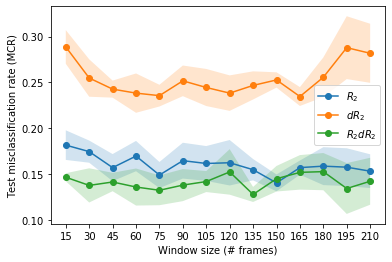

In [85]:
# 1.) Optimal window size over feature types for the Solo feature source and the P1 primitives type

import matplotlib
# matplotlib.rcParams.update({'font.size': 12})

max_tree_depth = 5
window_size = 75
feature_source = 'solo'
primitives_set = 'setPrim1'

feature_types = [
    # 'tR2',
    'R2',
    'dR2',
    'R2dR2',
    # 'tR2dR2',
]
feature_types_labels = {
    'R2': '$R_2$',
    'dR2': '$dR_2$',
    'R2dR2': '$R_2dR_2$'
}
window_sizes = [15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210]


for partition in ['test']:
    # plt.figure(figsize=[15,6])
    plt.figure()
    for feature_type in feature_types:
        means = np.array([ res[feature_source][primitives_set][feature_type][window_size][max_tree_depth][f'{partition}_mcrs_pruned_mean'] for window_size in window_sizes ])
        stds = np.array([ res[feature_source][primitives_set][feature_type][window_size][max_tree_depth][f'{partition}_mcrs_pruned_std'] for window_size in window_sizes ])
        plt.plot(window_sizes, means, 'o-', label=feature_types_labels[feature_type])
        plt.fill_between(window_sizes,  means - stds,  means + stds, alpha=.2)
    plt.xlabel('Window size (# frames)')
    plt.ylabel(f'{partition.capitalize()} misclassification rate (MCR)')
    plt.xticks(window_sizes, window_sizes)
    # plt.ylim(0, 0.25)
    # plt.ylim(0, 0.4)
    plt.legend()
    plt.show()


In [69]:
# 2.) Print table of test MCR (mean, std)

def get_tab_data(key, with_color_gradient=False):
    columns = [[], [], []]
    for i, primitives_set in enumerate(primitives_sets):
        for feature_source in feature_sources:
            for feature_type in feature_types:
                r = res[feature_source][primitives_set][feature_type][window_size][max_tree_depth]
                mean = f"{r[f'{key}_mean']:.3f}"
                columns[i].append( ("\gradient{" + mean + "}" if with_color_gradient else mean) + f"({r[f'{key}_std']:.3f})")
    return np.concatenate((
        [[f'{feature_types_labels[feature_type][1:-1]}' for feature_source in feature_sources for feature_type in feature_types]],
        [columns[0]], [columns[1]], [columns[2]]
    ), axis=0).T


headers = [
    'Feature source', 'Feature type',
    'P_1', 'P_2', 'P_{12}'
]
feature_sources_labels = [f'{feature_source.capitalize()}' for feature_source in feature_sources for feature_type in feature_types]

print(tabulate(get_tab_data('test_mcrs_pruned'), headers=headers, 
               tablefmt='fancy_grid', 
               showindex=feature_sources_labels, 
               numalign='center'
              ))

# Add color gradients for LaTex
print(tabulate(get_tab_data('test_mcrs_pruned', True), headers=headers, 
               tablefmt='latex_booktabs', 
               showindex=feature_sources_labels, 
               numalign='center'
              ))

╒══════════════════╤════════════════╤══════════════╤══════════════╤══════════════╕
│ Feature source   │ Feature type   │ P_1          │ P_2          │ P_{12}       │
╞══════════════════╪════════════════╪══════════════╪══════════════╪══════════════╡
│ Solo             │ R_2            │ 0.149(0.014) │ 0.164(0.004) │ 0.162(0.019) │
├──────────────────┼────────────────┼──────────────┼──────────────┼──────────────┤
│ Solo             │ dR_2           │ 0.236(0.012) │ 0.250(0.016) │ 0.202(0.010) │
├──────────────────┼────────────────┼──────────────┼──────────────┼──────────────┤
│ Solo             │ R_2dR_2        │ 0.132(0.016) │ 0.146(0.026) │ 0.135(0.013) │
├──────────────────┼────────────────┼──────────────┼──────────────┼──────────────┤
│ Duo              │ R_2            │ 0.308(0.026) │ 0.340(0.016) │ 0.314(0.008) │
├──────────────────┼────────────────┼──────────────┼──────────────┼──────────────┤
│ Duo              │ dR_2           │ 0.412(0.024) │ 0.412(0.027) │ 0.396(0.018) │
├───

In [34]:
# 3.) Print table of decision tree learning times (mean, std)

def get_tab_data(key, with_color_gradient=False):
    columns = [[], [], []]
    for i, primitives_set in enumerate(primitives_sets):
        for feature_source in feature_sources:
            for feature_type in feature_types:
                r = res[feature_source][primitives_set][feature_type][window_size][max_tree_depth]
                mean = f"{r[f'{key}_mean']:.0f}"
                columns[i].append( ("\gradient{" + mean + "}" if with_color_gradient else mean) + f"({r[f'{key}_std']:.0f})")
    return np.concatenate((
        [[f'{feature_types_labels[feature_type][1:-1]}' for feature_source in feature_sources for feature_type in feature_types]],
        [columns[0]], [columns[1]], [columns[2]]
    ), axis=0).T

print(tabulate(get_tab_data('times'), headers=headers, 
               tablefmt='fancy_grid', 
               showindex=feature_sources_labels, 
               numalign='center'
              ))

# Add color gradients for LaTex
print(tabulate(get_tab_data('times', True), headers=headers, 
               tablefmt='latex_booktabs', 
               showindex=feature_sources_labels, 
               numalign='center'
              ))

╒══════════════════╤════════════════╤═════════╤══════════╤═══════════╕
│ Feature source   │ Feature type   │ P_1     │ P_2      │ P_{12}    │
╞══════════════════╪════════════════╪═════════╪══════════╪═══════════╡
│ Solo             │ R_2            │ 16(1)   │ 449(18)  │ 433(22)   │
├──────────────────┼────────────────┼─────────┼──────────┼───────────┤
│ Solo             │ dR_2           │ 18(2)   │ 368(52)  │ 405(24)   │
├──────────────────┼────────────────┼─────────┼──────────┼───────────┤
│ Solo             │ R_2dR_2        │ 34(2)   │ 827(46)  │ 772(37)   │
├──────────────────┼────────────────┼─────────┼──────────┼───────────┤
│ Duo              │ R_2            │ 30(2)   │ 702(30)  │ 729(47)   │
├──────────────────┼────────────────┼─────────┼──────────┼───────────┤
│ Duo              │ dR_2           │ 26(1)   │ 473(52)  │ 504(49)   │
├──────────────────┼────────────────┼─────────┼──────────┼───────────┤
│ Duo              │ R_2dR_2        │ 70(3)   │ 1218(67) │ 1282(84)  │
├─────

In [89]:
# 4.) Print sample formulas

feature_type_to_features = {
    'R2': [r'{}_{i}\theta_p', r'{}_{i}\theta_y', r'{}_{j}\theta_p', r'{}_{j}\theta_y', r'{}_{k}\theta_p', r'{}_{k}\theta_y'],
    # 'dR2': [r'd\theta_p', r'd\theta_y'],
    # 'R2dR2': [r'\theta_p', r'\theta_y', r'd\theta_p', r'd\theta_y']
}

for feature_source in feature_sources:        
    for primitives_set in ['setPrim1']:
        for feature_type in ['R2']:
            print("=========================================================================\n",primitives_set, feature_source, feature_type)
            # Find shortest formula
            formula = min(res[feature_source][primitives_set][feature_type][window_size][max_tree_depth]['formulas_pruned'], key=len)
            # Replace temporal operators
            formula = formula.replace('F_', '\diamond_').replace('G_', '\square_')
            # Adjust range of feature types for duo and trio (works only for R2 feature type)
            start_idx = 0
            end_idx = 2
            if feature_source == 'duo':
                start_idx = 2
                end_idx = 6
            elif feature_source == 'trio':
                start_idx = 0
                end_idx = 6
            # Replace features
            for i, feature in enumerate(feature_type_to_features[feature_type][start_idx:end_idx]):
                formula = formula.replace("x_{" + str(i+1) + "}", feature)
            display(Math(formula))
            print("\n",formula)

 setPrim1 solo R2


<IPython.core.display.Math object>


 ((\square_{[1.21,2.46]}{}_{i}\theta_p<0.362 \wedge (\diamond_{[0.136,1.79]}{}_{i}\theta_p>0.11 \wedge (\square_{[1.7,2.47]}{}_{i}\theta_y<-0.447 \vee (\diamond_{[1.7,2.47]}{}_{i}\theta_y>-0.447 \wedge (\diamond_{[1.78,2.46]}{}_{i}\theta_p>0.119 \wedge \diamond_{[1.46,2.47]}{}_{i}\theta_y>0.561))))) \vee (\diamond_{[1.21,2.46]}{}_{i}\theta_p>0.362 \wedge ((\square_{[2.4,2.47]}{}_{i}\theta_y<0.171 \wedge (\diamond_{[2.01,2.43]}{}_{i}\theta_y>-0.0336 \wedge \diamond_{[0.674,1.27]}{}_{i}\theta_y<0.0813)) \vee \diamond_{[2.4,2.47]}{}_{i}\theta_y>0.171)))
 setPrim1 duo R2


<IPython.core.display.Math object>


 ((\square_{[1e-06,2.43]}{}_{k}\theta_y>0.0272 \wedge (\diamond_{[0.0117,2.16]}{}_{k}\theta_p>0.474 \wedge (\diamond_{[0.0788,0.56]}{}_{j}\theta_p>0.0613 \wedge \square_{[1e-06,2.41]}{}_{k}\theta_y<0.536))) \vee (\diamond_{[1e-06,2.43]}{}_{k}\theta_y<0.0272 \wedge ((\square_{[0.299,2.18]}{}_{k}\theta_y>-0.704 \wedge (\diamond_{[0.176,2.4]}{}_{j}\theta_y>-0.0922 \wedge (\square_{[0.126,0.167]}{}_{j}\theta_p<0.315 \vee (\diamond_{[0.126,0.167]}{}_{j}\theta_p>0.315 \wedge \square_{[1.58,2.38]}{}_{j}\theta_y>0.153)))) \vee \diamond_{[0.299,2.18]}{}_{k}\theta_y<-0.704)))
 setPrim1 trio R2


<IPython.core.display.Math object>


 ((\square_{[1.26,2.47]}{}_{i}\theta_p<0.361 \wedge (\diamond_{[1e-06,1.8]}{}_{i}\theta_p>0.111 \wedge (\square_{[1e-06,2.46]}{}_{j}\theta_y>0.188 \wedge (\square_{[0.641,2.25]}{}_{j}\theta_p>0.0174 \wedge \square_{[0.0275,2]}{}_{i}\theta_y<0.161)))) \vee (\diamond_{[1.26,2.47]}{}_{i}\theta_p>0.361 \wedge (\square_{[2.45,2.47]}{}_{i}\theta_y>0.159 \vee (\diamond_{[2.45,2.47]}{}_{i}\theta_y<0.159 \wedge (\diamond_{[2.02,2.47]}{}_{i}\theta_y>-0.0528 \wedge (\diamond_{[1e-06,1.58]}{}_{i}\theta_y<0.0792 \wedge \diamond_{[0.0733,1.96]}{}_{j}\theta_y>0.193))))))
